<a href="https://colab.research.google.com/github/parvathymd/Feynn-Labs-Internship-/blob/main/Mc_Donalds_Code_Conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#read the dataset -- Load the dataset
data = pd.read_csv('/content/mcdonalds.csv')

In [4]:
#name all the collumns
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [6]:
#show the dimension of the dataset
data.shape

(1453, 15)

In [29]:
'''from the above data we can see that the first 11 collumns are in
the form of YES/NO Convert it into binary 0 and 1'''

#converting them to numpy array
MD_x = data.iloc[:,0:11].replace({"Yes":1,"No":0}).values

#MD_x = np.where(MD_x == "Yes", 1, 0)

#Mean of the column-wise with 2 decimal points
#axis =0 indicates take mean of each column and collapsing the rows
column_means =np.round(MD_x.mean(axis =0),2)
print(column_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


###PCA

In [8]:
# perform principal component analysis on MD_x
from sklearn.decomposition import PCA
pca =PCA()
md_pca =pca.fit_transform(MD_x)

In [9]:
#provide the summary of pca
#Std deviation sqrt(variance)
standard_deviation =np.round(np.sqrt(pca.explained_variance_),4)
proportion_of_variance =np.round(pca.explained_variance_ratio_,4)

#cumulative proportion is obtained from sum of proportion of variance
cumulative_proportion = np.round(np.cumsum(proportion_of_variance),4)
print(standard_deviation)
print(proportion_of_variance)
print(cumulative_proportion)

[0.757  0.6075 0.5046 0.3988 0.3374 0.3103 0.2897 0.2751 0.2653 0.2488
 0.2369]
[0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]
[0.2994 0.4922 0.6252 0.7083 0.7678 0.8181 0.8619 0.9014 0.9382 0.9706
 0.9999]


In [10]:
#printing the rotation matrix of 11 columns
rot_mat = pd.DataFrame(np.round(-pca.components_.T,3))
rot_mat.index =data.columns[0:11] #setting the collumn names
rot_mat.columns = [f'PC{i+1}' for i in range(rot_mat.shape[1])] #[1] as we are taking the transpose
print(rot_mat)

              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy       0.477 -0.364  0.304 -0.055  0.308 -0.171  0.281 -0.013 -0.572   
convenient  0.155 -0.016  0.063  0.142 -0.278  0.348  0.060  0.113  0.018   
spicy       0.006 -0.019  0.037 -0.198 -0.071  0.355 -0.708 -0.376 -0.400   
fattening  -0.116  0.034  0.322  0.354  0.073  0.407  0.386 -0.590  0.161   
greasy     -0.304  0.064  0.802 -0.254 -0.361 -0.209 -0.036  0.138  0.003   
fast        0.108  0.087  0.065  0.097 -0.108  0.595  0.087  0.628 -0.166   
cheap       0.337  0.611  0.149 -0.119  0.129  0.103  0.040 -0.140 -0.076   
tasty       0.472 -0.307  0.287  0.003  0.211  0.077 -0.360  0.073  0.639   
expensive  -0.329 -0.601 -0.024 -0.068  0.003  0.261  0.068 -0.030 -0.067   
healthy     0.214 -0.077 -0.192 -0.763 -0.288  0.178  0.350 -0.176  0.186   
disgusting -0.375  0.140  0.089 -0.370  0.729  0.211  0.027  0.167  0.072   

             PC10   PC11  
yummy       0.110 -0.045  
convenient  0.666  0.

In [11]:
rot_mat.shape

(11, 11)

In [12]:
#Shap of pca components
pca.components_.shape

(11, 11)

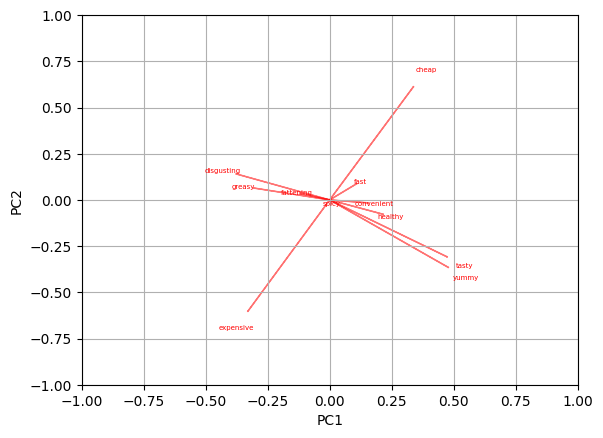

In [13]:
import matplotlib.pyplot as plt
plt.figure()
a=list(data.columns)
# Plot each component
for i in range(pca.components_.shape[0]):
  #arrows start from ceter that is(0,0) and its head is at(value of firstpca, value of sec pca)
    plt.arrow(0, 0, rot_mat.iloc[i, 0], rot_mat.iloc[i, 1], color='red', alpha=0.5)
    plt.text(rot_mat.iloc[i, 0] * 1.15, rot_mat.iloc[i, 1] * 1.15, f'{a[i]}', color='red', ha='center', va='center',fontsize =5)

# Set limits and labels
plt.xlim(-1, 1)
plt.ylim(-1, 1)

#label
plt.xlabel('PC1')
plt.ylabel('PC2')

# Display plot
plt.grid()
plt.show()

### K-MEANS

In [14]:
from sklearn.cluster import KMeans
np.random.seed(1234)

In [15]:
inertia_values = [] #List for intertia values

for n_clusters in range(1, 9):
    best_inertia = np.inf# Initialize the best inertia with a large number (infinity)
    for _ in range(10):
        kmeans = KMeans(n_clusters=n_clusters, random_state=np.random.randint(0, 10000))
        kmeans.fit(MD_x)
        if kmeans.inertia_ < best_inertia:# Check if current inertia is lower than best inertia
            best_inertia = kmeans.inertia_
    inertia_values.append(best_inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

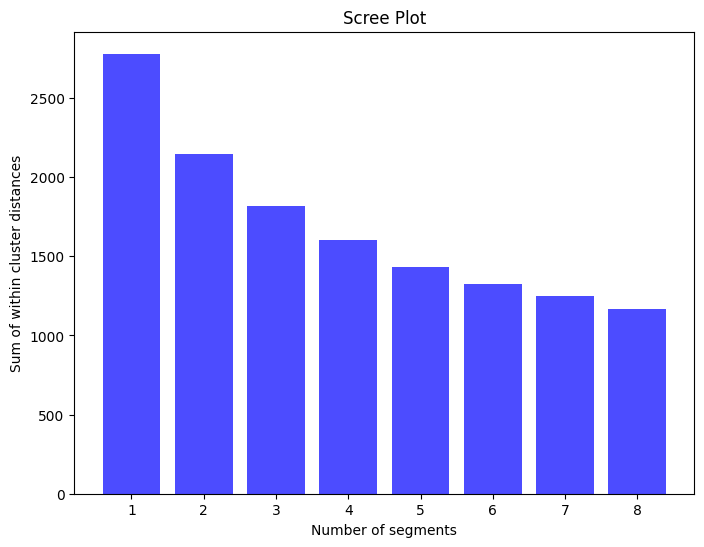

In [16]:
#plotin the inertia values
plt.figure(figsize=(8, 6))
plt.bar(range(1, 9), inertia_values, align='center', color='b', alpha=0.7)
plt.xlabel('Number of segments')
plt.ylabel('Sum of within cluster distances')
plt.title('Scree Plot')
#plt.grid(True)
plt.show()

###MD_KM28

In [17]:
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD_x)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans


###bootstrap

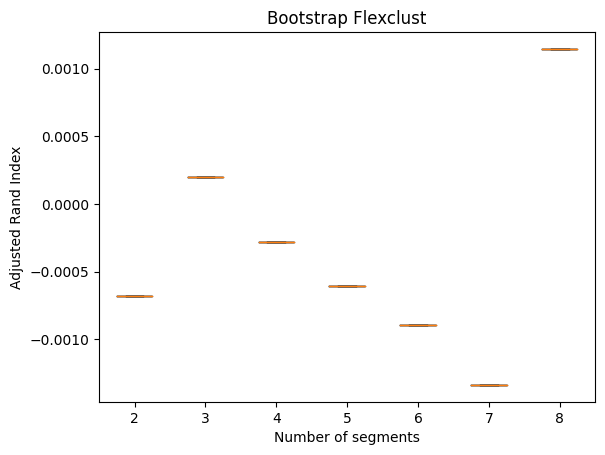

In [19]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

np.random.seed(1234)
nboot = 100
nrep = 10
bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(MD_x, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

# Initialize a list to hold the adjusted Rand index scores
adjusted_rand_index = []
num_segments = range(2, 9)  # Number of segments from 2 to 8

for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        # Fit KMeans on the bootstrap sample
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_sample)

        # Predict cluster labels for the bootstrap sample
        cluster_labels = kmeans.predict(bootstrap_sample)

        # Predict cluster labels for the original data
        true_labels = kmeans.predict(MD_x)  # Changed to use MD_x for true labels

        # Calculate the adjusted Rand index
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)

    # Append the stability scores for the current number of segments
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list to prepare for plotting
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create a boxplot of the adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

### Plotting the histogram

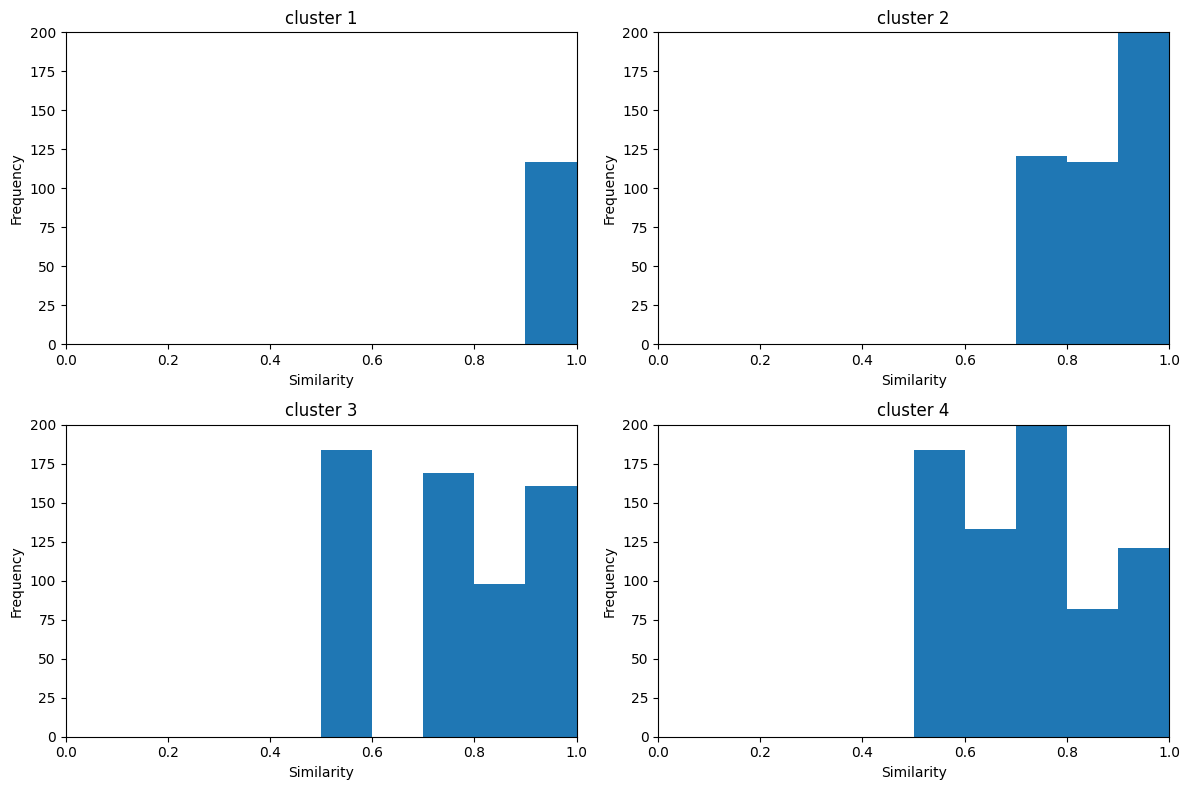

In [20]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):
    labels = MD_km28[str(i)].predict(MD_x)
    similarities = MD_km28[str(i)].transform(MD_x).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

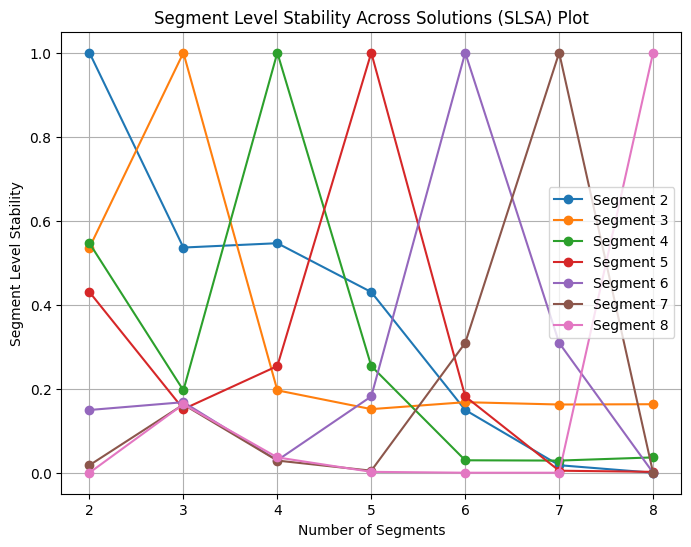

In [21]:
# Define the range of segment numbers to evaluate
num_segments = range(2, 9)

# Initialize a list to store stability labels for each segment count
segment_stability = []

# Loop through each number of segments from 2 to 8
for segment in num_segments:
    # Predict cluster labels using the KMeans model for the current number of segments
    labels_segment = MD_km28[str(segment)].predict(MD_x)
    # Append the labels to the segment stability list
    segment_stability.append(labels_segment)

# Set up the plot
plt.figure(figsize=(8, 6))

# Loop through each segment's stability results
for i, segment in enumerate(num_segments):
    # Calculate the mean stability for the current segment against all previous segments
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability],
             marker='o', label=f'Segment {segment}')


plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

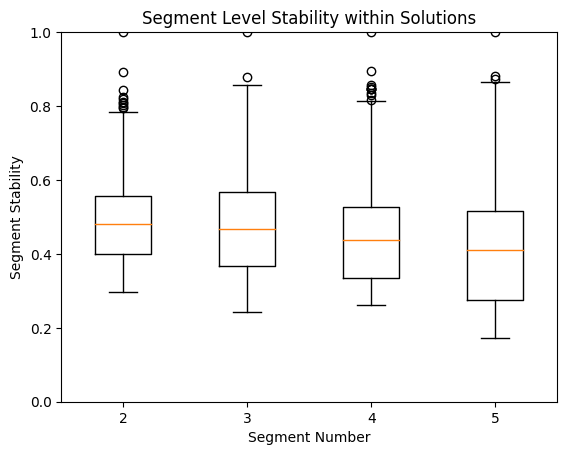

In [22]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD_x)
    segment_similarities[segment] = MD_km28[segment].transform(MD_x).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

In [31]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD_x)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD_x.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     6       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     6       True  3   3 -1818.717659  3643.435318  3659.279475  3658.209672
2     9       True  4   4 -1604.107292  3216.214583  3237.340126  3235.989403
3    11       True  5   5 -1434.610417  2879.220835  2905.627763  2904.035975
4     8       True  6   6 -1331.652440  2675.304880  2706.993194  2705.228430
5     6       True  7   7 -1248.417887  2510.835774  2547.805474  2545.884829
6     9       True  8   8 -1182.100019  2380.200037  2422.451123  2420.433939


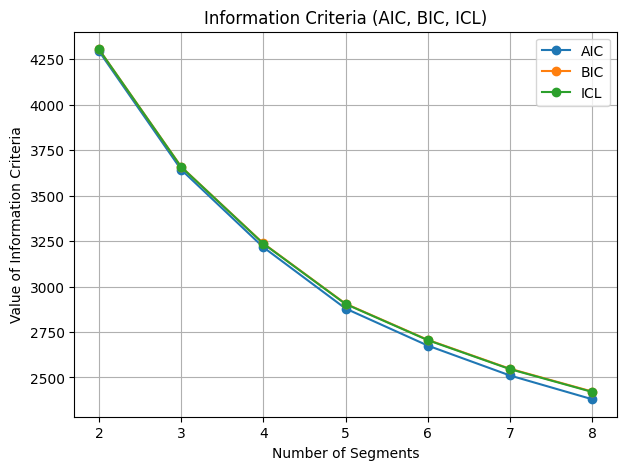

In [32]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [34]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD_x)
kmeans_clusters = kmeans.predict(MD_x)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD_x)
gmm_clusters = gmm.predict(MD_x)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD_x[results['mixture'] == 3]

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164
kmeans   0   1   2   3
kmeans                
0       76  52  73  32
1       40  39  51  27
2       27  30  31  11
3       43  35  51  34


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD_x)

log_likelihood_m4a = gmm_m4a.score(MD_x)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD_x)

log_likelihood_m4 = gmm_m4.score(MD_x)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 11.727872558164462
Log-likelihood for MD.m4: 11.151316714845965


In [37]:
like_counts = pd.value_counts(data['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [38]:
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

data['Like.n'] = data['Like'].map(like_mapping)


like_n_counts = data['Like.n'].value_counts()


print(like_n_counts)

Like.n
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [39]:
from patsy import dmatrices

independent_vars = data.columns[0:11]

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=data)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [40]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=data)
y = dmatrix('Like', data=data)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 468
2: 985


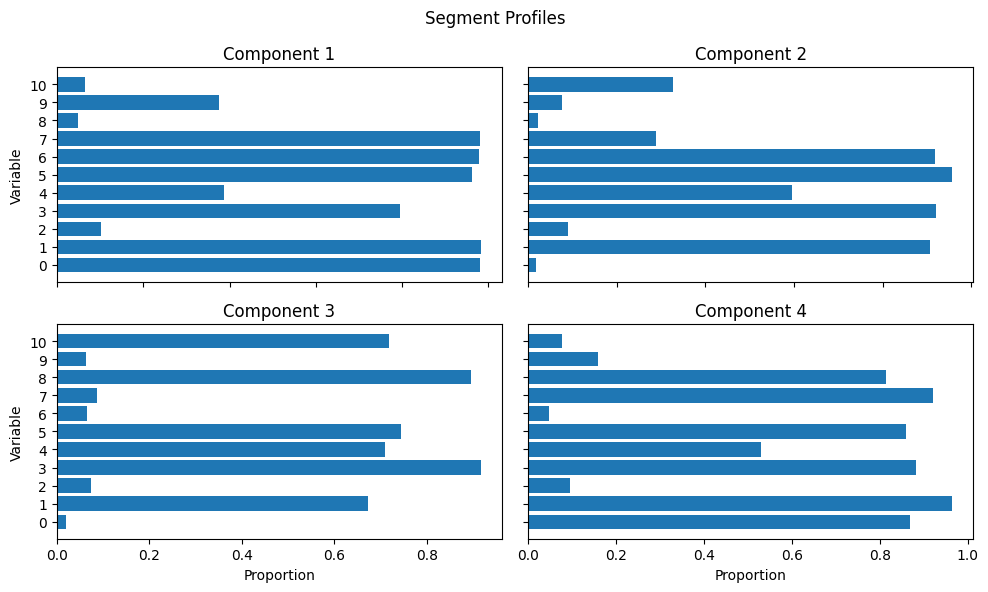

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

kmeans = MD_km28['4']
labels = kmeans.labels_

# Convert MD_x to a Pandas DataFrame
MD_x_df = pd.DataFrame(MD_x)

# Now you can use groupby
MD_mean = MD_x_df.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD_x_df.columns) # Use the DataFrame for column names

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


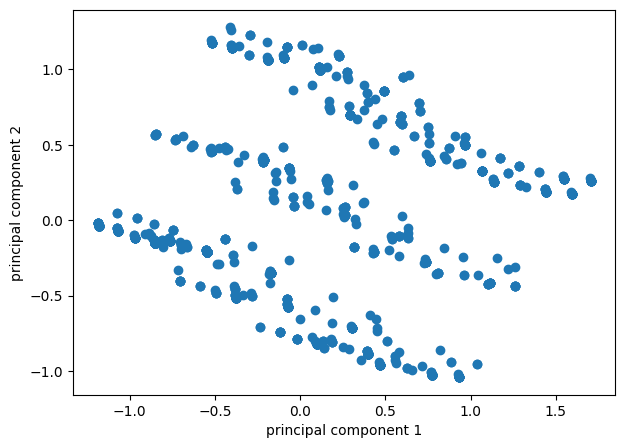

In [46]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)
kmeans.fit(MD_x)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Plot the results

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

In [48]:
data1=pd.read_csv("mcdonalds.csv")
data1.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


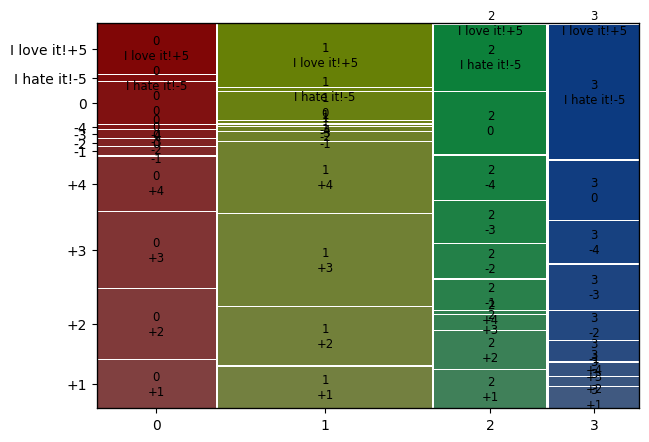

In [50]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
# Assuming 'data1' is the dataframe containing the categorical variables
# Define a function to perform label encoding for a given column 'x'
def labelling(x):
    data1[x] = LabelEncoder().fit_transform(data1[x])
    return data1

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

# Label encode each categorical column
for i in cat:
    labelling(i)

# Extract only the categorical columns from 'data1'
df_eleven = data1.loc[:, cat]

# Perform KMeans clustering with 4 clusters on the categorical data
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)

# Add a new column 'cluster_num' to 'data1' containing the cluster labels
data1['cluster_num'] = kmeans.labels_

# Create a cross-tabulation between 'cluster_num' and 'Like' columns
crosstab = pd.crosstab(data1['cluster_num'], data1['Like'])
# Reordering columns for better visualization
# crosstab = crosstab[['I hate it!-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', 'I love it!+5']]

# Create a mosaic plot to visualize the relationship between 'cluster_num' and 'Like'
plt.rcParams['figure.figsize'] = (7, 5)
mosaic(crosstab.stack())
plt.show()


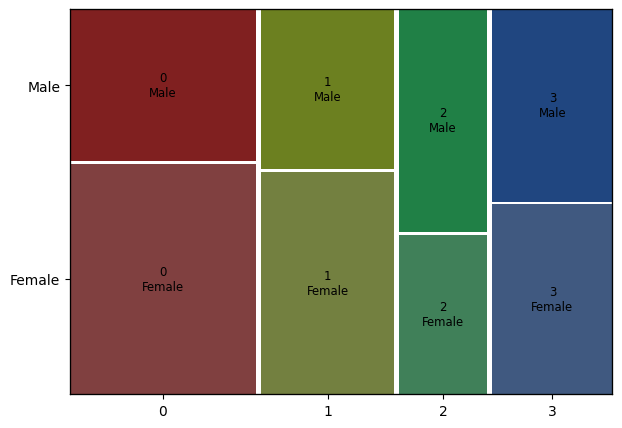

In [51]:
#Importing Require Libries
from statsmodels.graphics.mosaicplot import mosaic

# Assuming that 'MD_km28' is a DataFrame containing clustered data, and 'data' is another DataFrame containing the data with the 'Gender' column.
# Extract the cluster labels for the cluster number 4 from the 'MD_km28' DataFrame
MD_k4 = MD_km28['4']

# Get the cluster labels from 'MD_k4'
k4 = MD_k4.labels_

# Create a cross-tabulation (contingency table) between the cluster labels 'k4' and the 'Gender' column in the 'data' DataFrame
ct = pd.crosstab(k4, data1['Gender'])

# Visualize the cross-tabulation using a mosaic plot
mosaic(ct.stack(), gap=0.01)

# Show the plot
plt.show()


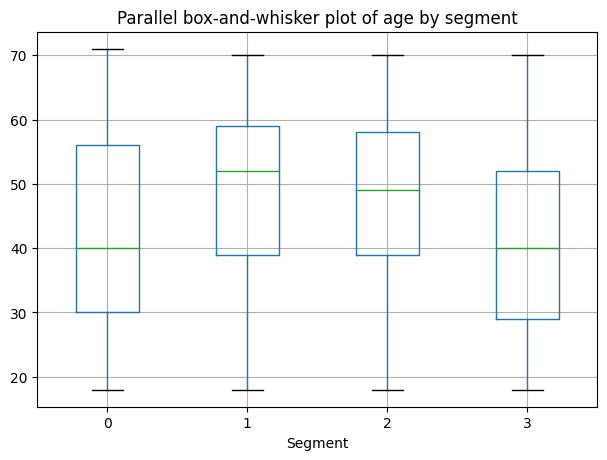

In [52]:
# Create a new DataFrame 'df' with 'Segment' and 'Age' columns from the original dataset 'data'.
df = pd.DataFrame({'Segment': k4, 'Age': data1['Age']})

# Generate a box-and-whisker plot of 'Age' grouped by 'Segment'.
df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [53]:
data1['VisitFrequency'] = LabelEncoder().fit_transform(data1['VisitFrequency'])
visit = data1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [54]:
#Like
data1['Like'] = LabelEncoder().fit_transform(data1['Like'])
Like = data1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [55]:
data1['Gender'] = LabelEncoder().fit_transform(data1['Gender'])
Gender = data1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


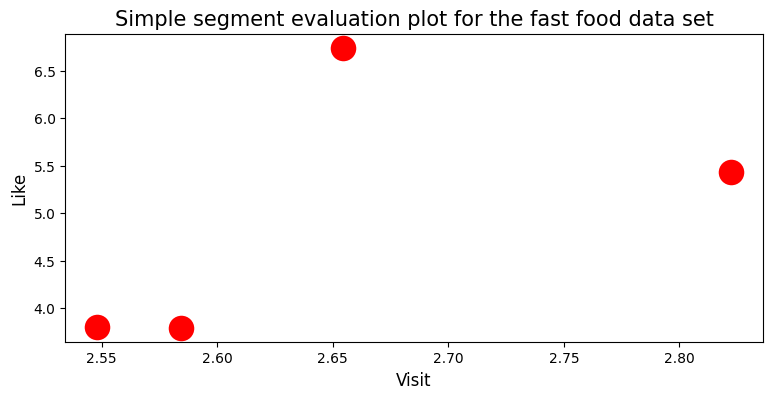

In [56]:
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()

###MOSAIC PLOT

In [23]:
# run the data code again
df = pd.read_csv('/content/mcdonalds.csv')

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'cluster_num'],
      dtype='object')
Index(['-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4'], dtype='object', name='Like')


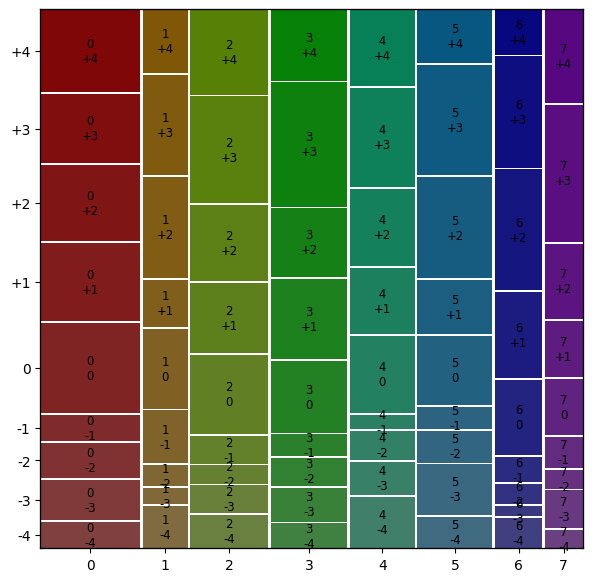

Like,-4,-3,-2,-1,0,+1,+2,+3,+4
cluster_num,,,,,,,,,
0,11,17,15,11,38,33,32,29,35
1,8,3,4,10,15,9,19,19,12
2,11,9,6,9,26,23,25,35,28
3,8,11,9,7,23,26,22,40,23
4,14,9,8,4,21,18,21,27,21
5,10,16,10,7,22,17,32,35,17
6,6,2,4,5,15,17,24,22,9
7,3,6,3,5,9,9,12,22,15


None

In [26]:
# crosstab creation
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
df['cluster_num'] = kmeans.labels_
print(df.columns)
crosstab = pd.crosstab(df['cluster_num'], df['Like'])

# Get a list of existing columns in the crosstab
existing_columns = crosstab.columns

# Select only the columns that exist in the crosstab
selected_columns = [col for col in ['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5'] if col in existing_columns]
crosstab = crosstab[selected_columns]

print(crosstab.columns) # Print the columns to verify

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,7)
mosaic(crosstab.stack())
display(crosstab, plt.show())

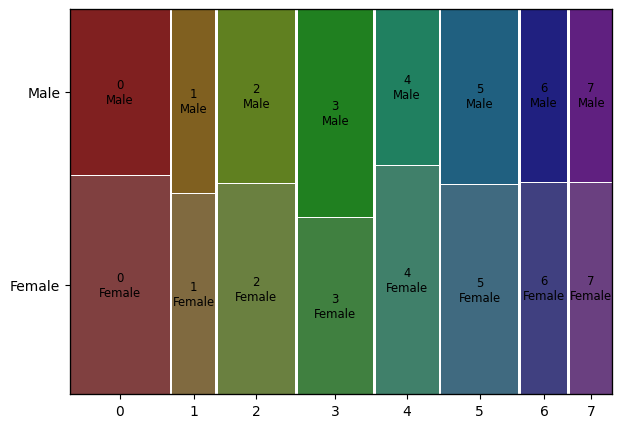

Like,-4,-3,-2,-1,0,+1,+2,+3,+4
cluster_num,,,,,,,,,
0,11,17,15,11,38,33,32,29,35
1,8,3,4,10,15,9,19,19,12
2,11,9,6,9,26,23,25,35,28
3,8,11,9,7,23,26,22,40,23
4,14,9,8,4,21,18,21,27,21
5,10,16,10,7,22,17,32,35,17
6,6,2,4,5,15,17,24,22,9
7,3,6,3,5,9,9,12,22,15


None

In [27]:
# crosstab creation
crosstab_gender = pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
display(crosstab, plt.show())

###Wrong Didnt use md_km28

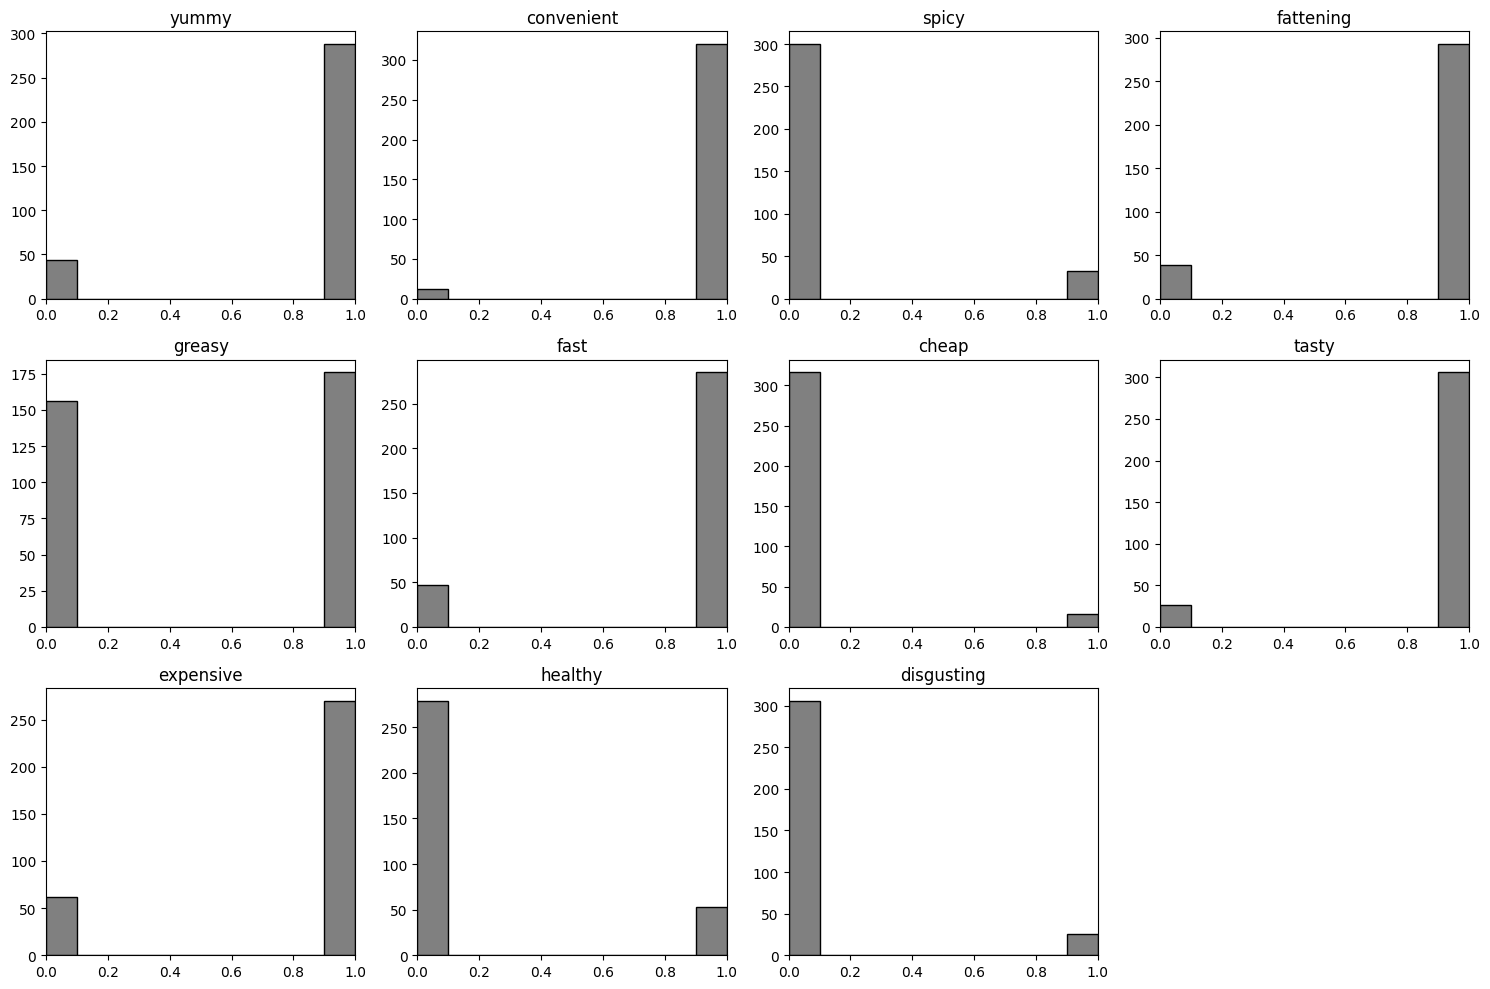

In [16]:
np.random.seed(1234)

# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans.fit(MD_x)
cluster_labels = kmeans.labels_

# Extract data points assigned to cluster 4 (indexing starts from 0, so cluster 4 is actually cluster 3)
cluster_4_data = MD_x[cluster_labels == 3]

# Plot histogram for each feature
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs = axs.flatten()
features = data.columns[:11]

for i, ax in enumerate(axs):
    if i < len(features):
        ax.hist(cluster_4_data[:, i], bins=10, range=(0, 1), color='grey', edgecolor='black')
        ax.set_title(features[i])
        ax.set_xlim(0, 1)
    else:
        fig.delaxes(ax)  # Remove empty subplots

plt.tight_layout()
plt.show()

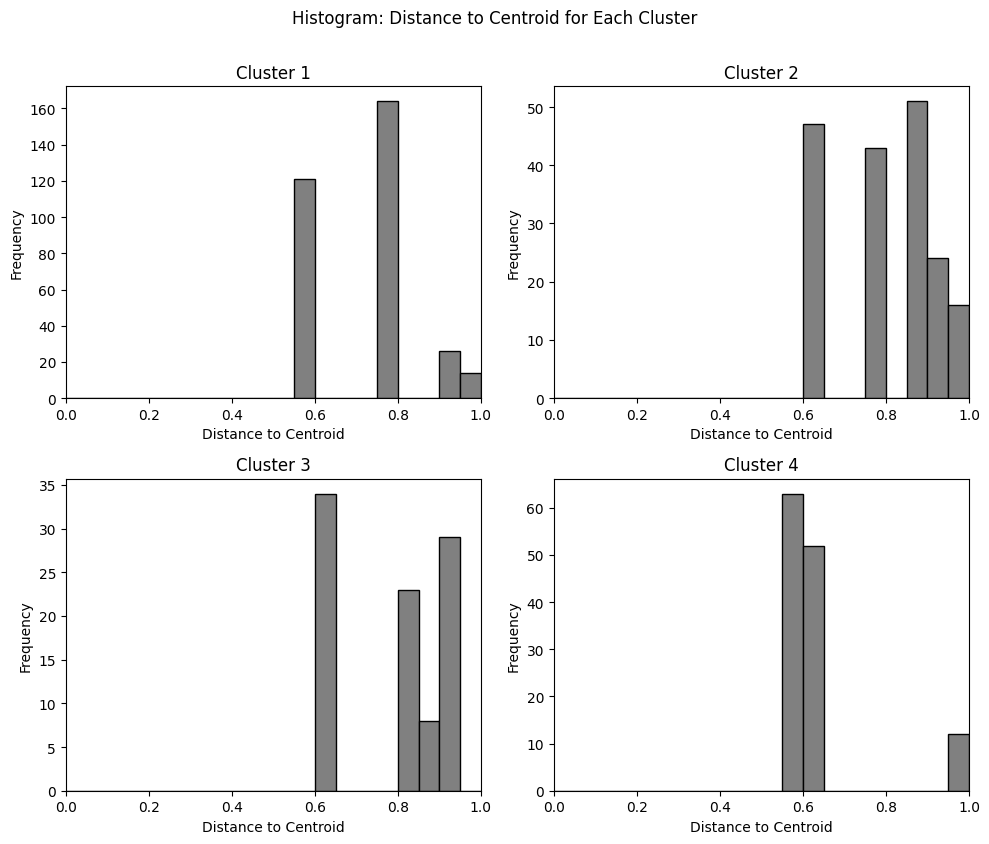

In [24]:
from sklearn.metrics import pairwise_distances_argmin_min
np.random.seed(1234)

# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans.fit(MD_x)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Calculate distances of each data point to its respective cluster centroid
distances = np.zeros(MD_x.shape[0])
for i in range(4):
    cluster_points = MD_x[cluster_labels == i]
    _, min_distances = pairwise_distances_argmin_min(cluster_points, [centroids[i]])
    distances[cluster_labels == i] = min_distances

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Cluster': cluster_labels,
    'Distance': distances
})

# Plot histograms for each cluster
plt.figure(figsize=(10, 8))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.hist(plot_data[plot_data['Cluster'] == i]['Distance'], bins=20, range=(0, 1), color='grey', edgecolor='black')
    plt.title(f'Cluster {i+1}')
    plt.xlim(0, 1)
    plt.xlabel('Distance to Centroid')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Histogram: Distance to Centroid for Each Cluster', y=1.05)
plt.show()

###md_k4 Wrong plot

In [25]:
kmeans_results = {}
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    kmeans_results[n_clusters] = kmeans

# Select the four-segment solution
MD_k4 = kmeans_results[4].labels_

<Figure size 1000x600 with 0 Axes>

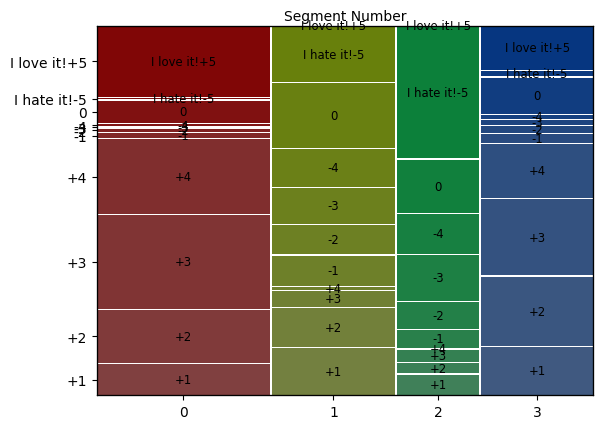

In [30]:
from statsmodels.graphics.mosaicplot import mosaic


data['Segment'] = kmeans.labels_

# Create a cross-tabulation of segment membership and the Like variable
contingency_table = pd.crosstab(data['Segment'], data['Like'])

# Create the mosaic plot
plt.figure(figsize=(10, 6))
mosaic(contingency_table.stack(), title=None, labelizer=lambda x: x[1],
       properties={"edgecolor": "black", "facecolor": "lightgrey"})

plt.xlabel('Segment Number')
plt.ylabel('Loving or Hating McDonald’s')
#plt.xticks(ticks=np.arange(4), labels=[f'Segment {i+1}' for i in range(4)])
plt.show()